<a href="https://colab.research.google.com/github/bpatl/ai-ml-notebooks/blob/main/aimlbook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Tensorflow library

In [6]:
import tensorflow as tf
from google.colab import files

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8595 - loss: 0.4808
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9557 - loss: 0.1497
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9662 - loss: 0.1116
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9720 - loss: 0.0905
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9778 - loss: 0.0711
Evaluating the model...
313/313 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.0745

Test accuracy: 0.9767000079154968
Model saved as mnist_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


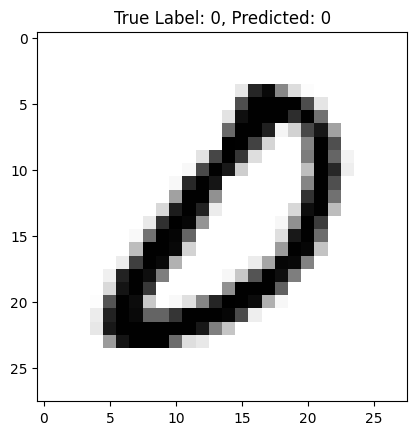

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple sequential model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training the model...")
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on test data
print("Evaluating the model...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Save the trained model
model.save("mnist_model.keras")
print("Model saved as mnist_model.keras")

# Inference (Making predictions on new data)
def make_inference(model, sample):
    prediction = model.predict(sample.reshape(1, 28, 28))  # Reshape to match input shape
    predicted_label = np.argmax(prediction)
    return predicted_label

# Load a random sample from the test set and make a prediction
sample_index = np.random.randint(len(x_test))
sample_image = x_test[sample_index]
true_label = y_test[sample_index]

# Make a prediction
loaded_model = tf.keras.models.load_model("mnist_model.keras")
predicted_label = make_inference(loaded_model, sample_image)

# Display the result
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
plt.show()

# Download the generated model
files.download("mnist_model.keras")
